In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as pl
from matplotlib.pylab import rcParams
import os

In [2]:
%matplotlib inline

In [3]:
mainDir= '/accounts/ekarakoy/disk02/UNCERTAINTIES/BIAS/Test1/'
f_w_bias = 'Test_193012909_bias.L2'
f_no_bias = 'Test_193012909_no_bias.L2'

In [4]:
fBiasPath = os.path.join(mainDir,f_w_bias)
fNoBiasPath = os.path.join(mainDir,f_no_bias)

In [5]:
fBiasPath

'/accounts/ekarakoy/disk02/UNCERTAINTIES/BIAS/Test1/Test_193012909_bias.L2'

In [7]:
bands = ['412','443','490','510','555','670','765','865']
rrsBiasDict = dict.fromkeys(bands)
ltBiasDict = dict.fromkeys(bands)
rrsNoBiasDict = dict.fromkeys(bands)
ltNoBiasDict = dict.fromkeys(bands)

In [8]:
def GetData(fpath, ltDict,rrsDict,**kwargs):
    with nc.Dataset(fpath) as ds:
        gpv = ds.groups['geophysical_data'].variables
        for band in bands:
            ltDict[band] = gpv['Lt_' + band][:]
            if int(band) <= 670:
                rrsDict[band] = gpv['Rrs_' + band][:]
    #return ltDict,rrsDict

In [9]:
GetData(fBiasPath,ltBiasDict,rrsBiasDict)

In [10]:
GetData(fNoBiasPath,ltNoBiasDict,rrsNoBiasDict)

In [ ]:
f,axs = pl.subplots(nrows=3,ncols=2,figsize=(8,12))
for band,ax in zip(bands[:-2],axs.ravel()):
    ax.hist(rrsNoBiasDict[band].compressed(),bins=100,histtype='stepfilled',color='k',
           label='unbiased')
    ax.hist(rrsBiasDict[band].compressed(),bins=100,histtype='stepfilled',color='orange',
           alpha=0.1,label='biased')
    ax.set_title('%s' % band)
    ax.legend(loc='best')

In [11]:
def PlotHists(biasDict,unBiasedDict,rngs,masked=True,histo=True):
    f,axs = pl.subplots(nrows=3,ncols=2,figsize=(8,12))
    for band,ax,rng in zip(bands[:-2],axs.ravel(),rngs):
        if masked:
            newMask = np.ma.make_mask((biasDict[band].mask + unBiasedDict[band].mask))
            biasedData = np.ma.array(biasDict[band].data,mask=newMask)
            unbiasedData = np.ma.array(unBiasedDict[band].data,mask=newMask)
            data = 100 * ( (biasedData.compressed() - unbiasedData.compressed())
                          / unbiasedData.compressed())
        else:
            data = 100 * ( (biasDict[band].flatten() - unBiasedDict[band].flatten())
                          / unBiasedDict[band].flatten())
        
        if histo:
            ax.hist(data,bins=100,histtype='stepfilled',color='k',
                   label='% diff.',range=rng,normed=True)
        else:
            ax.plot(data,'+',color='k',label='%diff.')
        ax.set_title('%s' % band)
        ax.legend(loc='best')
        ax.set_xlim(rng)

/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


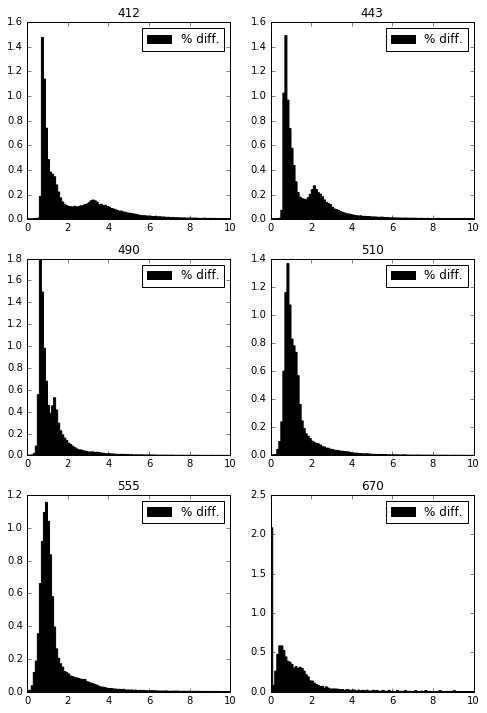

In [12]:
ranges=[(0,10)] * 5 + [(0,10)]
PlotHists(rrsBiasDict,rrsNoBiasDict,ranges)

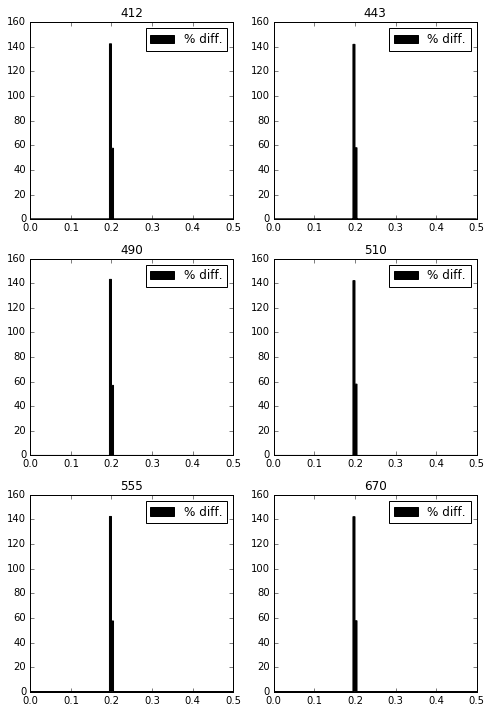

In [13]:
ranges=[(0,0.5)] * 6
PlotHists(ltBiasDict,ltNoBiasDict,ranges,masked=False)

In [ ]:
f,axs = pl.subplots(nrows=3,ncols=2,figsize = (8,10))
for ax,band in zip(axs.ravel(),bands):
    ax.hist(ltBiasDict[band].flatten(),bins=100,color='orange',histtype='stepfilled')
    ax.hist(ltNoBiasDict[band].flatten(),bins=100,color='k',alpha=0.5,
            histtype='stepfilled')

In [ ]:
for band in bands:
    print(np.array_equal(ltBiasDict[band].flatten(),ltNoBiasDict[band].flatten()))

In [ ]:
for band in bands:
    print(np.allclose(ltBiasDict[band].flatten(),ltNoBiasDict[band].flatten(),equal_nan=True))

In [ ]:
ltDiffDict = dict.fromkeys(bands[:-2])
for band in bands[:-2]:
    bigMask = np.ma.make_mask(rrsBiasDict[band].mask + rrsNoBiasDict[band].mask)
    ltBiased = np.ma.array(ltBiasDict[band],mask=bigMask)
    ltUnBiased = np.ma.array(ltNoBiasDict[band],mask=bigMask)
    ltDiffDict[band] = ((ltBiased.compressed() - ltUnBiased.compressed()) 
                        / ltUnBiased.compressed())* 100
    print (ltDiffDict[band].mean())

In [ ]:
ltDiffDict